# Date: 2019-04-30 to 2019-05-13

In [1]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '/home/phongdk/tmp/score.gz'
df = pd.read_csv(filename, dtype={'user_id':str}, index_col='user_id')
df.shape

(18131601, 11)

In [3]:
df.head()

,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score
user_id,,,,,,,,,,,
-1000000110326343913,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1000000144354477425,4.0,4.9,3.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1000000144354477425,4.0,4.9,3.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1000001506781019035,4.0,4.8,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1000007235349542945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
column_name = df.columns

In [5]:
# gs = gridspec.GridSpec(nrows=4, ncols=2)
# plt.figure(figsize=(30,40))
# for r in range(4):
#     for c in range(2):
#         plt.subplot(gs[r,c])
#         col = column_name[r * 2 + c]
#         sns.distplot(df[col])
#         plt.title(col)

In [6]:
def get_value_counts(df):
    for col in df.columns:
        print(col, "---------------------")
        print(df[col].value_counts(sort=False).sort_index(ascending=True))

# Count frequency for each column

In [7]:
get_value_counts(df)

gender_score ---------------------
0.0    5734116
4.0    5444957
5.0    6952528
Name: gender_score, dtype: int64
age_score ---------------------
0.0    5734116
1.0    2825285
2.0    2871666
4.8    3676711
4.9    2190708
5.0     833115
Name: age_score, dtype: int64
device_score ---------------------
0.0    8852314
1.0    1848330
2.0    1855708
3.0      31829
3.5    4243735
4.0     393444
4.5       1599
5.0     904642
Name: device_score, dtype: int64
address_score ---------------------
0.000000    9213543
1.000000    3516122
1.250000          1
1.277778          1
1.312500          3
1.333333          1
1.357143         13
1.400000          1
1.406250          1
1.416667         28
1.433333          1
1.500000        162
1.555556          1
1.571429         35
1.625000       1959
1.642857          1
1.650000          1
1.666667         80
1.705882          1
1.714286          1
1.722222          5
1.727273          1
1.739130          1
1.800000        506
1.807692          7
1.812500   

In [9]:
df['total_score'] = df.sum(axis=1)
df.head()

,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score,total_score
user_id,,,,,,,,,,,,
-1000000110326343913,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
-1000000144354477425,4.0,4.9,3.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.4
-1000000144354477425,4.0,4.9,3.5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.4
-1000001506781019035,4.0,4.8,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8
-1000007235349542945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Distribution on total_score
### Lots of users with low score <=5

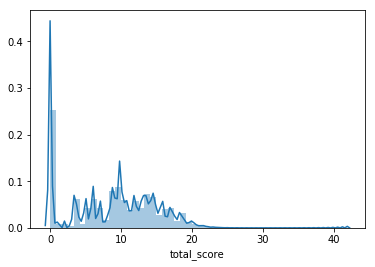

In [11]:
sns.distplot(df['total_score'])

# Check value counts for all users with total_score < 5
- Gender: Unknown
- Age: Unknown
- Other Properties: Almost score 0.0

In [12]:
get_value_counts(df[df['total_score'] < 5])

gender_score ---------------------
0.0    5201904
Name: gender_score, dtype: int64
age_score ---------------------
0.0    5201904
Name: age_score, dtype: int64
device_score ---------------------
0.0    3948549
1.0     123966
2.0     108499
3.0      31829
3.5     859872
4.0     127946
4.5       1243
Name: device_score, dtype: int64
address_score ---------------------
0.0    4867715
1.0     266514
3.5      67675
Name: address_score, dtype: int64
travel_score ---------------------
0.0    5201904
Name: travel_score, dtype: int64
airline_score ---------------------
0.0    5201904
Name: airline_score, dtype: int64
luxury_score ---------------------
0.0    5201904
Name: luxury_score, dtype: int64
resort_score ---------------------
0.0    5201904
Name: resort_score, dtype: int64
hotel_score ---------------------
0.0    5201884
4.0         20
Name: hotel_score, dtype: int64
tour_score ---------------------
0.0    5201901
4.0          3
Name: tour_score, dtype: int64
shopping_score -------------

# Check value counts for all users with total_score >= 5

In [13]:
get_value_counts(df[df['total_score'] >= 5])

gender_score ---------------------
0.0     532212
4.0    5444957
5.0    6952528
Name: gender_score, dtype: int64
age_score ---------------------
0.0     532212
1.0    2825285
2.0    2871666
4.8    3676711
4.9    2190708
5.0     833115
Name: age_score, dtype: int64
device_score ---------------------
0.0    4903765
1.0    1724364
2.0    1747209
3.5    3383863
4.0     265498
4.5        356
5.0     904642
Name: device_score, dtype: int64
address_score ---------------------
0.000000    4345828
1.000000    3249608
1.250000          1
1.277778          1
1.312500          3
1.333333          1
1.357143         13
1.400000          1
1.406250          1
1.416667         28
1.433333          1
1.500000        162
1.555556          1
1.571429         35
1.625000       1959
1.642857          1
1.650000          1
1.666667         80
1.705882          1
1.714286          1
1.722222          5
1.727273          1
1.739130          1
1.800000        506
1.807692          7
1.812500         20
1.8181

# Now, check the distribution of users with total_score >=5

## It skew to the left with a long right tail

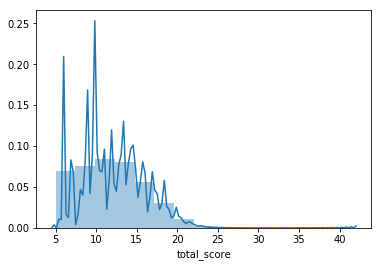

In [14]:
sns.distplot(df[df['total_score'] >= 5]['total_score'], bins=15, hist=True, kde=True)

# Check value counts for all users with total_score >20
- Gender: identify
- Age: 5 score means 26-55 age
- Other Properties: 

In [15]:
get_value_counts(df[df['total_score'] > 20])

gender_score ---------------------
0.0         6
4.0     80000
5.0    205107
Name: gender_score, dtype: int64
age_score ---------------------
0.0         6
1.0      1853
2.0     26517
4.8    178693
4.9     56110
5.0     21934
Name: age_score, dtype: int64
device_score ---------------------
0.0      2857
1.0      5165
2.0     24426
3.5    171907
4.0      8670
4.5        11
5.0     72077
Name: device_score, dtype: int64
address_score ---------------------
0.000000      339
1.000000     3945
1.250000        1
1.277778        1
1.312500        1
1.357143        2
1.406250        1
1.416667        6
1.500000       21
1.571429       15
1.625000      230
1.642857        1
1.650000        1
1.666667       34
1.705882        1
1.722222        2
1.727273        1
1.800000      253
1.807692        1
1.812500        9
1.818182        1
1.833333     3113
1.866667        2
1.888889        1
1.894737        1
1.928571       28
1.954545        5
2.000000     1275
2.033333        2
2.045455        1
  

# Check users with total score >30

In [16]:
df[df['total_score'] > 30].sort_values(by=['total_score'], ascending=False)

,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score,total_score
user_id,,,,,,,,,,,,
-3536057382352974752,4.0,4.8,3.5,4.250000,4.0,5.0,5.0,0.0,4.0,4.0,3.0,41.550000
-2171480957679224779,5.0,4.8,5.0,5.000000,0.0,5.0,0.0,5.0,4.0,4.0,3.0,40.800000
-3838649428935987885,5.0,4.8,5.0,5.000000,0.0,0.0,5.0,5.0,4.0,4.0,3.0,40.800000
-3943732838385043946,5.0,4.8,5.0,3.500000,0.0,5.0,0.0,5.0,4.0,4.0,3.0,39.300000
5173604143891527899,4.0,2.0,3.5,4.250000,4.0,5.0,5.0,0.0,4.0,4.0,3.0,38.750000
432097308372053102,4.0,4.8,3.5,4.250000,4.0,5.0,0.0,5.0,4.0,4.0,0.0,38.550000
-9071029466792997843,4.0,4.8,3.5,5.000000,0.0,5.0,0.0,5.0,4.0,4.0,3.0,38.300000
6863958989219477573,5.0,2.0,5.0,5.000000,0.0,5.0,0.0,5.0,4.0,4.0,3.0,38.000000
7923963689987561180,5.0,4.8,5.0,5.000000,0.0,5.0,0.0,5.0,4.0,4.0,0.0,37.800000


### 0.04 % usres with total_score > 20

In [17]:
len(df[df['total_score'] > 20]) / len(df) * 100

1.5724645606309116

### 1% users with total_score > 15

In [18]:
len(df[df['total_score'] > 15]) / len(df) * 100

15.212589335050996

# Check users with smart phone

In [19]:
df_smart_phone = df[(df['os_name_score'] == 3) | (df['os_name_score'] == 3.5) | (df['os_name_score'] == 4.5)]

KeyError: 'os_name_score'

In [ ]:
get_value_counts(df_smart_phone)

In [ ]:
sns.distplot(df_smart_phone[df_smart_phone['total_score'] >= 5]['total_score'], bins=15, hist=True, kde=True)

In [ ]:
print(100.0 * len(df_smart_phone[df_smart_phone['total_score'] > 15]) / len(df_smart_phone[df_smart_phone['total_score'] >=5]))

# Statistic Test

In [ ]:
x_label_income = ['Low', 'Medium', 'High', 'Luxury']

In [ ]:
income_Bachan = [2532818, 1506937, 259549, 4562]

In [ ]:
# income_Bachan_prop = income_Bachan / np.sum(income_Bachan)
# income_Bachan_prop

In [ ]:
# income_Bachan_accumulate_prop = np.cumsum(income_Bachan_prop)
# print(income_Bachan_accumulate_prop)

In [ ]:
sns.barplot(x=x_label_income, y=income_Bachan)

In [ ]:
df_total_score = df.copy()
df_total_score.head()

#  Test statistics ( Chi-square statistics on two observed methods)
- Since the number users on Bachan ~ 5M, our method ~18M, so the test is not correct in my opinion.
- Perhaps we need to use similar number users for both methods, no need to be the same but not too different

In [ ]:
threshold_income = [9.5, 13, 15.5]

In [ ]:
def get_income_category(x):
    # 0: low, 1: mid, 2: high, 3: so rich (luxury)
    for (i, t) in enumerate(threshold_income):
        if (x < t):
            return i
    return len(threshold_income)

In [ ]:
df_total_score['income'] = df_total_score['total_score'].apply(lambda x: get_income_category(x))

In [ ]:
df_total_score = df_total_score[['total_score', 'income']]
df_total_score.head()

In [ ]:
# income_prop = df_total_score['income'].value_counts(normalize=True, sort=False)
# print(income_prop)
# income_accumulate_prop = np.cumsum(income_prop.values)

In [ ]:
# def get_Kolmogorov_Smirnov_Statistic(first_accumulate_prop, second_accumulate_prob):
#     critical_value = 1.36 * 1 / np.sqrt(len(first_accumulate_prop))
#     gap = abs(first_accumulate_prop - second_accumulate_prob)
#     max_gap = np.max(gap)
#     print('critical value: {} \t Max gap: {}'.format(critical_value, max_gap))
#     return max_gap < critical_value

In [ ]:
# get_Kolmogorov_Smirnov_Statistic(income_Bachan_accumulate_prop, income_accumulate_prop)

In [ ]:
income_our_method = df_total_score['income'].value_counts(sort=False)
income_our_method

In [ ]:
sns.barplot(x=x_label_income, y=income_our_method)
plt.ylabel('Count')

In [ ]:
arr_test = np.array([[11,5,1], [8, 6, 8], [3, 10, 12]])
df_test = pd.DataFrame(index=['ER', 'LR', 'BQ'], columns=['Fruit', 'Flower', 'Mixed'], data=arr_test)

In [ ]:
df_test

In [ ]:
from scipy import stats

In [ ]:
def chi_square_test(df):
    marginal_count_method = df.sum(axis=1)
    marginal_count_income = df.sum(axis=0)
    total_count = marginal_count_method.sum()
    assert total_count == marginal_count_income.sum()
    #print('total count', total_count)
    expected_values = np.zeros_like(df, dtype=float)
    for i in range(expected_values.shape[0]):
        for j in range(expected_values.shape[1]):
            expected_values[i,j] = marginal_count_method[i] * marginal_count_income[j] / total_count
    df_expected = pd.DataFrame(index=df.index, columns=df.columns, data=expected_values)
    print(df_expected)
    chi_square = ((df - df_expected)**2 / df_expected).sum().sum()
    degree_of_freedom = (expected_values.shape[0] - 1 ) * (expected_values.shape[1] - 1)
    print('Chi_square : {} '.format(chi_square))
    print('Degree of freedom : {}'.format(degree_of_freedom))
    p_values = 1 - stats.chi2.cdf(chi_square, degree_of_freedom)
    print('p_value:', p_values)
    return p_values,4

In [ ]:
chi_square_test(df_test)

### p_value < 0.05 --> (ER, LR, BQ) and (Fruit, Flower, Mixed) are dependent

In [ ]:
df_two_methods = pd.DataFrame(index=['Bachan', 'Our method'], columns=x_label_income, data=np.array([income_Bachan, income_our_method]))

In [ ]:
df_two_methods

In [ ]:
p_value = chi_square_test(df_two_methods)

# Check statistics with proportion instead of counting number
- It is wrong since this statistics test only for the counting number

In [ ]:
income_Bachan_prop = income_Bachan / np.sum(income_Bachan)
income_our_method_prop = df_total_score['income'].value_counts(normalize=True, sort=False).values

In [ ]:
income_Bachan_prop

In [ ]:
income_our_method_prop

In [ ]:
df_two_methods_prop = pd.DataFrame(index=['Bachan', 'Our method'], columns=x_label_income, 
                                   data=np.array([income_Bachan_prop, income_our_method_prop]))

In [ ]:
df_two_methods_prop

In [ ]:
chi_square_test(df_two_methods_prop)